In [49]:
import numpy as np
import pandas as pd

In [77]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [78]:
print(train.head(10))
print(train.tail(10))
print(test.head(10))
print(test.tail(10))

         Date   Open   High    Low  Close  Up
0  2004-01-02  50.85  50.91  50.62  50.72   1
1  2004-01-05  50.75  50.84  50.61  50.79   1
2  2004-01-06  50.87  51.26  50.86  51.15   1
3  2004-01-07  51.45  51.54  51.29  51.51   0
4  2004-01-08  51.15  51.33  51.02  51.28   0
5  2004-01-09  51.11  51.32  51.01  51.01   0
6  2004-01-12  50.80  50.90  50.55  50.87   0
7  2004-01-13  50.90  50.98  50.53  50.61   1
8  2004-01-14  50.43  50.65  50.40  50.64   1
9  2004-01-15  51.01  51.27  50.70  51.01   1
            Date    Open    High     Low   Close  Up
2016  2012-01-04  106.97  107.90  106.70  107.19   1
2017  2012-01-05  108.98  109.70  108.36  109.26   1
2018  2012-01-06  109.46  109.99  109.29  109.86   0
2019  2012-01-09  110.51  110.55  109.45  109.55   0
2020  2012-01-10  109.54  109.70  108.85  109.12   0
2021  2012-01-11  108.62  109.00  108.41  108.86   1
2022  2012-01-12  109.68  109.90  109.44  109.83   0
2023  2012-01-13  109.53  109.72  109.08  109.66   1
2024  2012-01-17 

In [79]:
print(train.shape)
print(test.shape)

(2026, 6)
(1200, 5)


In [80]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2026 non-null   object 
 1   Open    2026 non-null   float64
 2   High    2026 non-null   float64
 3   Low     2026 non-null   float64
 4   Close   2026 non-null   float64
 5   Up      2026 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 95.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1200 non-null   object 
 1   Open    1200 non-null   float64
 2   High    1200 non-null   float64
 3   Low     1200 non-null   float64
 4   Close   1200 non-null   float64
dtypes: float64(4), object(1)
memory usage: 47.0+ KB
None


In [81]:
print(train['Date'].head())

0    2004-01-02
1    2004-01-05
2    2004-01-06
3    2004-01-07
4    2004-01-08
Name: Date, dtype: object


In [82]:
train.set_index(keys='Date', inplace=True)

In [83]:
print(train.head())

             Open   High    Low  Close  Up
Date                                      
2004-01-02  50.85  50.91  50.62  50.72   1
2004-01-05  50.75  50.84  50.61  50.79   1
2004-01-06  50.87  51.26  50.86  51.15   1
2004-01-07  51.45  51.54  51.29  51.51   0
2004-01-08  51.15  51.33  51.02  51.28   0


In [67]:
from matplotlib import pyplot as plt

In [84]:
print(train.describe)

<bound method NDFrame.describe of               Open    High     Low   Close  Up
Date                                          
2004-01-02   50.85   50.91   50.62   50.72   1
2004-01-05   50.75   50.84   50.61   50.79   1
2004-01-06   50.87   51.26   50.86   51.15   1
2004-01-07   51.45   51.54   51.29   51.51   0
2004-01-08   51.15   51.33   51.02   51.28   0
...            ...     ...     ...     ...  ..
2012-01-11  108.62  109.00  108.41  108.86   1
2012-01-12  109.68  109.90  109.44  109.83   0
2012-01-13  109.53  109.72  109.08  109.66   1
2012-01-17  109.99  110.47  109.57  109.96   1
2012-01-18  110.06  110.82  109.94  110.58   0

[2026 rows x 5 columns]>


In [85]:
train['Date'] = train['Date'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))

KeyError: 'Date'

In [86]:
trainX_new = train.loc[train.index > datetime(2008-10-2),['Open', 'High', 'Low', 'Close']]

TypeError: function missing required argument 'month' (pos 2)

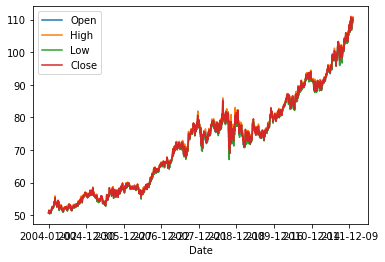

In [60]:
trainX_new.plot(kind='line')
plt.show()

In [41]:
from datetime import datetime

In [87]:
sr_up = train['Up']

In [88]:
print(sr_up.value_counts())

1    1045
0     981
Name: Up, dtype: int64


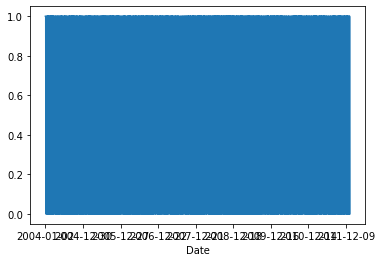

In [89]:
sr_up.plot(kind='line')
plt.show()

In [72]:
up_monthly = sr_up.resample(rule='M')

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [90]:
train['Body'] = train['Open'] - train['Close']

In [75]:
from sklearn.model_selection import train_test_split

In [91]:
# 説明変数をX_dataに格納
X_data = train.drop(columns=['Up'])

# 目的変数をy_dataに格納
y_data = train['Up']

# X_dataとy_dataの先頭5行を確認
print(X_data.head())
print(y_data.head())

             Open   High    Low  Close  Body
Date                                        
2004-01-02  50.85  50.91  50.62  50.72  0.13
2004-01-05  50.75  50.84  50.61  50.79 -0.04
2004-01-06  50.87  51.26  50.86  51.15 -0.28
2004-01-07  51.45  51.54  51.29  51.51 -0.06
2004-01-08  51.15  51.33  51.02  51.28 -0.13
Date
2004-01-02    1
2004-01-05    1
2004-01-06    1
2004-01-07    0
2004-01-08    0
Name: Up, dtype: int64


In [92]:
# train_test_splitのインポート
from sklearn.model_selection import train_test_split

# 学習データおよび検証データと、評価データに80:20の割合で2分割する
X_trainval, X_test, y_trainval, y_test = train_test_split(X_data, y_data, test_size=0.20, shuffle=False)

# 学習データと検証データに75:25の割合で2分割する
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, shuffle=False)

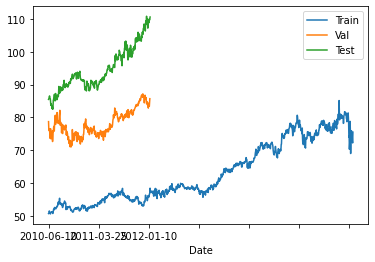

In [93]:
# 学習データのCloseの描画
X_train['Close'].plot(kind='line')

# 検証データのCloseの描画
X_val['Close'].plot(kind='line')

# 評価データのCloseの描画
X_test['Close'].plot(kind='line')

# 折れ線グラフの凡例を表示
plt.legend(['Train', 'Val', 'Test'])

# 描画の実行
plt.show()

In [94]:
from sklearn.preprocessing import StandardScaler

In [95]:
def get_t(X, num_date):
    X_t_list = []
    for i in range(len(X) - num_date + 1):
        X_t = X.iloc[i:i+num_date, :]
        X_t_list.append(X_t)
    return X_t_list

# 期間の設定
num_date = 5
# 関数get_tの呼び出し
X_t_list = get_t(X=X_train, num_date=num_date)
# 学習データの1件目を表示
print(X_t_list[0])
# 学習データの2件目を表示
print(X_t_list[1])

             Open   High    Low  Close  Body
Date                                        
2004-01-02  50.85  50.91  50.62  50.72  0.13
2004-01-05  50.75  50.84  50.61  50.79 -0.04
2004-01-06  50.87  51.26  50.86  51.15 -0.28
2004-01-07  51.45  51.54  51.29  51.51 -0.06
2004-01-08  51.15  51.33  51.02  51.28 -0.13
             Open   High    Low  Close  Body
Date                                        
2004-01-05  50.75  50.84  50.61  50.79 -0.04
2004-01-06  50.87  51.26  50.86  51.15 -0.28
2004-01-07  51.45  51.54  51.29  51.51 -0.06
2004-01-08  51.15  51.33  51.02  51.28 -0.13
2004-01-09  51.11  51.32  51.01  51.01  0.10


In [96]:
# 関数get_tの定義
def get_t(X, num_date):
    # 入力データをNumPy配列に変換
    X = np.array(X)
    X_t_list = []
    for i in range(len(X) - num_date + 1):
        X_t = X[i:i+num_date, :]
        X_t_list.append(X_t)
    # Numpy配列のreturn
    return np.array(X_t_list)
    
num_date = 5    

# get_tの呼び出し
X_array_data = get_t(X=X_train, num_date=num_date)

# 学習データの1件目を表示
print(X_array_data[0])
# 学習データの2件目を表示
print(X_array_data[1])

[[ 5.085e+01  5.091e+01  5.062e+01  5.072e+01  1.300e-01]
 [ 5.075e+01  5.084e+01  5.061e+01  5.079e+01 -4.000e-02]
 [ 5.087e+01  5.126e+01  5.086e+01  5.115e+01 -2.800e-01]
 [ 5.145e+01  5.154e+01  5.129e+01  5.151e+01 -6.000e-02]
 [ 5.115e+01  5.133e+01  5.102e+01  5.128e+01 -1.300e-01]]
[[ 5.075e+01  5.084e+01  5.061e+01  5.079e+01 -4.000e-02]
 [ 5.087e+01  5.126e+01  5.086e+01  5.115e+01 -2.800e-01]
 [ 5.145e+01  5.154e+01  5.129e+01  5.151e+01 -6.000e-02]
 [ 5.115e+01  5.133e+01  5.102e+01  5.128e+01 -1.300e-01]
 [ 5.111e+01  5.132e+01  5.101e+01  5.101e+01  1.000e-01]]


In [99]:
# 関数get_standardized_tの定義
def get_standardized_t(X, num_date):
    X = np.array(X)
    X_t_list = []
    for i in range(len(X) - num_date + 1):
        X_t = X[i:i+num_date]
        scaler = StandardScaler()
        X_standardized = scaler.fit_transform(X_t)
        X_t_list.append(X_standardized)
    return np.array(X_t_list)

num_date = 5

# 学習用、検証用、評価用データの加工
X_train_t =  get_standardized_t(X=X_train, num_date=num_date)
X_val_t = get_standardized_t(X=X_val, num_date=num_date)
X_test_t = get_standardized_t(X=X_test, num_date=num_date)

# 学習用、検証用、評価用データの形の表示
print(X_train_t.shape)
print(X_val_t.shape)
print(X_test_t.shape)

(1211, 5, 5)
(401, 5, 5)
(402, 5, 5)


In [100]:
num_date = 5  

# 目的変数の変形
y_train_t = y_train[num_date-1 :]
y_val_t = y_val[num_date-1 :]
y_test_t = y_test[num_date-1 :]

# 目的変数の形の表示
print(y_train_t.shape)
print(y_val_t.shape)
print(y_test_t.shape)

# 目的変数の平均値の表示
print(y_train_t.mean())
print(y_val_t.mean())
print(y_test_t.mean())

(1211,)
(401,)
(402,)
0.5152766308835673
0.49625935162094764
0.5298507462686567


In [105]:
# Sequentialのインポート
from keras.models import Sequential
# Dense、LSTMのインポート
from keras.layers import Dense, LSTM

In [106]:
# ネットワークの各層のサイズの定義
num_l1 = 100
num_l2 = 20
num_output = 1

# 以下、ネットワークを構築
model = Sequential()
# 第1層
model.add(LSTM(units=num_l1,
                activation='tanh',
                batch_input_shape=(None, X_train_t.shape[1], X_train_t.shape[2])))
# 第2層
model.add(Dense(num_l2, activation='relu'))
# 出力層
model.add(Dense(num_output, activation='sigmoid'))
# ネットワークのコンパイル
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [107]:
# モデルの学習の実行（学習の完了までには数秒から数十秒ほど時間がかかります。）
result = model.fit(x=X_train_t, y=y_train_t, epochs=80, batch_size=24, validation_data=(X_val_t, y_val_t))

Epoch 1/80
51/51 [==============================] - 3s 20ms/step - loss: 0.6863 - accuracy: 0.5562 - val_loss: 0.6687 - val_accuracy: 0.5985
Epoch 2/80
51/51 [==============================] - 0s 6ms/step - loss: 0.6712 - accuracy: 0.5759 - val_loss: 0.6434 - val_accuracy: 0.6484
Epoch 3/80
51/51 [==============================] - 0s 5ms/step - loss: 0.6415 - accuracy: 0.6336 - val_loss: 0.6359 - val_accuracy: 0.6334
Epoch 4/80
51/51 [==============================] - 0s 6ms/step - loss: 0.6424 - accuracy: 0.6210 - val_loss: 0.6337 - val_accuracy: 0.6409
Epoch 5/80
51/51 [==============================] - 0s 7ms/step - loss: 0.6429 - accuracy: 0.6335 - val_loss: 0.6285 - val_accuracy: 0.6509
Epoch 6/80
51/51 [==============================] - 0s 7ms/step - loss: 0.6402 - accuracy: 0.6372 - val_loss: 0.6285 - val_accuracy: 0.6509
Epoch 7/80
51/51 [==============================] - 0s 6ms/step - loss: 0.6262 - accuracy: 0.6508 - val_loss: 0.6288 - val_accuracy: 0.6559
Epoch 8/80
51/51 [=

51/51 [==============================] - 0s 7ms/step - loss: 0.2369 - accuracy: 0.9152 - val_loss: 1.0867 - val_accuracy: 0.6209
Epoch 60/80
51/51 [==============================] - 0s 8ms/step - loss: 0.2269 - accuracy: 0.9115 - val_loss: 1.0714 - val_accuracy: 0.6259
Epoch 61/80
51/51 [==============================] - 0s 6ms/step - loss: 0.2162 - accuracy: 0.9310 - val_loss: 1.1374 - val_accuracy: 0.6110
Epoch 62/80
51/51 [==============================] - 0s 6ms/step - loss: 0.2315 - accuracy: 0.9139 - val_loss: 1.1364 - val_accuracy: 0.6334
Epoch 63/80
51/51 [==============================] - 0s 6ms/step - loss: 0.1906 - accuracy: 0.9383 - val_loss: 1.1948 - val_accuracy: 0.6185
Epoch 64/80
51/51 [==============================] - 0s 6ms/step - loss: 0.1585 - accuracy: 0.9597 - val_loss: 1.2167 - val_accuracy: 0.6135
Epoch 65/80
51/51 [==============================] - 0s 5ms/step - loss: 0.1711 - accuracy: 0.9337 - val_loss: 1.2562 - val_accuracy: 0.6309
Epoch 66/80
51/51 [======

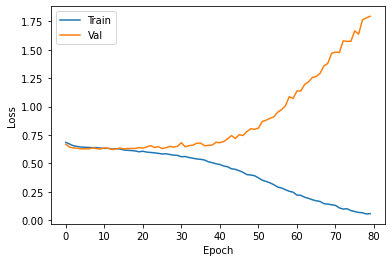

In [108]:
# 折れ線グラフによる学習データの損失の描画
plt.plot(result.history['loss'])

# 折れ線グラフによる検証データの損失の描画
plt.plot(result.history['val_loss'])

# 凡例の指定
plt.legend(['Train', 'Val'])

# グラフの軸タイトルの指定
plt.xlabel('Epoch')
plt.ylabel('Loss')

# 描画の実行
plt.show()

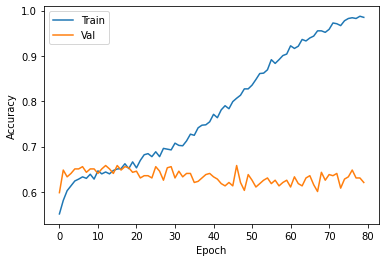

In [110]:
# 折れ線グラフによる学習データの正解率の描画
plt.plot(result.history['accuracy'])

# 折れ線グラフによる検証データの正解率の描画
plt.plot(result.history['val_accuracy'])

# 凡例の指定
plt.legend(['Train', 'Val'])

# グラフの軸タイトルの指定
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# 描画の実行
plt.show()

In [111]:
# 評価データの正解率の計算
loss, accuracy = model.evaluate(X_test_t, y_test_t)

# 評価データの正解率の表示
print('評価データの正解率:', accuracy)

13/13 [==============================] - 0s 2ms/step - loss: 2.3912 - accuracy: 0.5348
評価データの正解率: 0.53482586145401


In [113]:
# Dropoutのインポート
from keras.layers import Dropout

# ネットワークの各層のサイズの定義
num_l1 = 100
num_l2 = 20
num_output = 1

# Dropoutの割合の定義
dropout_rate = 0.4

# 以下、ネットワークを構築
model = Sequential()
# 第1層
model.add(LSTM(units=num_l1,
                activation='tanh',
                batch_input_shape=(None, X_train_t.shape[1], X_train_t.shape[2])))
model.add(Dropout(dropout_rate))
# 第2層
model.add(Dense(num_l2, activation='relu'))
model.add(Dropout(dropout_rate))
# 出力層
model.add(Dense(num_output, activation='sigmoid'))
# ネットワークのコンパイル
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# モデルの学習の実行（学習の完了までには数秒から数十秒ほど時間がかかります。）
result = model.fit(x=X_train_t, y=y_train_t, epochs=80, batch_size=24, validation_data=(X_val_t, y_val_t))

Epoch 1/80
51/51 [==============================] - 2s 16ms/step - loss: 0.6926 - accuracy: 0.5141 - val_loss: 0.6789 - val_accuracy: 0.5935
Epoch 2/80
51/51 [==============================] - 0s 6ms/step - loss: 0.6840 - accuracy: 0.5703 - val_loss: 0.6662 - val_accuracy: 0.5985
Epoch 3/80
51/51 [==============================] - 0s 6ms/step - loss: 0.6746 - accuracy: 0.5733 - val_loss: 0.6525 - val_accuracy: 0.6284
Epoch 4/80
51/51 [==============================] - 0s 6ms/step - loss: 0.6657 - accuracy: 0.5881 - val_loss: 0.6381 - val_accuracy: 0.6434
Epoch 5/80
51/51 [==============================] - 0s 6ms/step - loss: 0.6599 - accuracy: 0.5942 - val_loss: 0.6317 - val_accuracy: 0.6384
Epoch 6/80
51/51 [==============================] - 0s 9ms/step - loss: 0.6472 - accuracy: 0.6149 - val_loss: 0.6339 - val_accuracy: 0.6434
Epoch 7/80
51/51 [==============================] - 0s 5ms/step - loss: 0.6660 - accuracy: 0.6066 - val_loss: 0.6316 - val_accuracy: 0.6459
Epoch 8/80
51/51 [=

51/51 [==============================] - 0s 5ms/step - loss: 0.5656 - accuracy: 0.6863 - val_loss: 0.6649 - val_accuracy: 0.6459
Epoch 60/80
51/51 [==============================] - 0s 5ms/step - loss: 0.5586 - accuracy: 0.6998 - val_loss: 0.6800 - val_accuracy: 0.6559
Epoch 61/80
51/51 [==============================] - 0s 5ms/step - loss: 0.5655 - accuracy: 0.6950 - val_loss: 0.6763 - val_accuracy: 0.6509
Epoch 62/80
51/51 [==============================] - 0s 5ms/step - loss: 0.5289 - accuracy: 0.7293 - val_loss: 0.6803 - val_accuracy: 0.6359
Epoch 63/80
51/51 [==============================] - 0s 5ms/step - loss: 0.5627 - accuracy: 0.6932 - val_loss: 0.6905 - val_accuracy: 0.6384
Epoch 64/80
51/51 [==============================] - 0s 5ms/step - loss: 0.5169 - accuracy: 0.7441 - val_loss: 0.6852 - val_accuracy: 0.6359
Epoch 65/80
51/51 [==============================] - 0s 5ms/step - loss: 0.5369 - accuracy: 0.7243 - val_loss: 0.7020 - val_accuracy: 0.6409
Epoch 66/80
51/51 [======

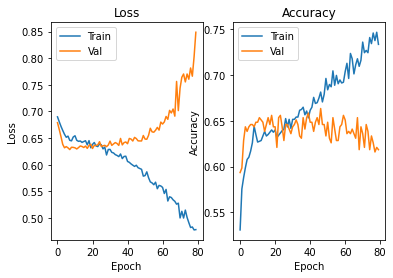

In [115]:
# 損失のグラフの描画
plt.subplot(1, 2, 1)
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.legend(['Train', 'Val'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')

# 正解率のグラフの描画
plt.subplot(1, 2, 2)
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.legend(['Train', 'Val'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')

# 描画の実行
plt.show()

In [ ]:
# ライブラリのインポート
import numpy as np
from sklearn.metrics import accuracy_score

# 評価データの予測結果の算出
pred_prob = model.predict(X_test_t)

# 予測結果の先頭10件を確認
print('予測結果の先頭10件')
print(pred_prob[:10])

# 評価データの予測結果を0もしくは1に丸め込み
pred = np.round(pred_prob)

# 丸め込んだ予測結果の先頭10件を確認
print('丸め込んだ予測結果の先頭10件')
print(pred[:10])

# 評価データの正解率の計算
accuracy = accuracy_score(y_true=y_test_t, y_pred=pred)

# 評価データの正解率の表示
print('評価データの正解率:', accuracy)

In [129]:
pred_prob = pd.DataFrame(pred_prob).to_csv('pred_prob.csv')